## Thing to do:
### Find the correlation between views and like and dislike
### Find the most popular category on youtube
### The preference difference between US and UK
### Is number of comment affecting the like or dislike? ( showing will people be affected by the view)
### Discover the effect of the title

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
df_UK=pd.read_csv('./data/GBvideos.csv')
df_US = pd.read_csv('./data/USvideos.csv')

In [3]:
df_UK.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

df=pd.read_csv('./data/CAvideos.csv')

files=[file for file in os.listdir('./data')]

youtube_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./data/'+file , encoding = 'latin1')
    youtube_data=pd.concat([youtube_data, df])

youtube_data.to_csv('all_data.csv', index=False)

In [4]:
df_UK.drop('video_id',axis=1, inplace =True)

In [5]:
df_UK.head(1000)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17.18.11,HERO Johnnie Langendorff Fires Back at Sutherl...,College News Network,25,2017-11-06T00:00:39.000Z,"Johnnie Langendorff|""Sutherland Springs""|""San ...",1175958,5047,404,3210,https://i.ytimg.com/vi/rwYd2kIZxk4/default.jpg,False,False,False,Hero Johnnie Langendorf passed the Sutherland ...
996,17.18.11,This Week I Learned Downhill Mountain Biking,Mike Boyd,24,2017-11-06T14:43:29.000Z,"mike boyd|""downhill""|""biking""|""mountain biking...",369291,15019,197,1698,https://i.ytimg.com/vi/0Yp9WS6cJFA/default.jpg,False,False,False,The first 500 people to use this link will get...
997,17.18.11,[M/V] SEVENTEEN(세븐틴) - 박수(CLAP),SEVENTEEN,10,2017-11-06T09:00:00.000Z,"세븐틴|""SEVENTEEN""|""PLEDIS""|""플레디스""|""박수""|""CLAP""|""T...",7434919,434255,4734,38460,https://i.ytimg.com/vi/CyzEtbG-sxY/default.jpg,False,False,False,"타이틀곡 ‘박수’는 이번 정규 2집 앨범‘TEEN, AGE’의 타이틀곡으로 소년으로..."
998,17.19.11,MINECON Earth 2017 Livestream,TeamMojang,20,2017-11-18T19:12:51.000Z,"Minecon|""Minecraft""|""Microsoft""|""Mojang""",787508,0,0,5302,https://i.ytimg.com/vi/A_Z3AokMwWI/default.jpg,False,True,False,Pre-show starts at 39:47\nMINECON Earth show s...


In [6]:
df_UK['comments_disabled'].value_counts()

False    38233
True       683
Name: comments_disabled, dtype: int64

In [7]:
df_UK['comments_disabled'] = df_UK['comments_disabled'].apply(lambda x: 1 if x == True else 0)
df_UK['ratings_disabled'] = df_UK['ratings_disabled'].apply(lambda x: 1 if x == True else 0)
df_UK['video_error_or_removed'] = df_UK['video_error_or_removed'].apply(lambda x: 1 if x == True else 0)

In [8]:
df_UK.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04,38916.000000,38916.000000,38916.000000
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04,0.017551,0.006989,0.001773
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04,0.131313,0.083311,0.042071
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02,0.000000,0.000000,0.000000
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03,0.000000,0.000000,0.000000
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03,0.000000,0.000000,0.000000
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,1.000000,1.000000,1.000000


In [9]:
df_UK['publish_time']= pd.to_datetime(df_UK['publish_time'])

In [10]:
df_UK['Year'] = df_UK['publish_time'].dt.year
df_UK['Month']= df_UK['publish_time'].dt.month

In [11]:
for feature in df_UK.columns:
    print('The number of missing value in ' + str(feature) +':' + str(df_UK[feature].isnull().sum()))

The number of missing value in trending_date:0
The number of missing value in title:0
The number of missing value in channel_title:0
The number of missing value in category_id:0
The number of missing value in publish_time:0
The number of missing value in tags:0
The number of missing value in views:0
The number of missing value in likes:0
The number of missing value in dislikes:0
The number of missing value in comment_count:0
The number of missing value in thumbnail_link:0
The number of missing value in comments_disabled:0
The number of missing value in ratings_disabled:0
The number of missing value in video_error_or_removed:0
The number of missing value in description:612
The number of missing value in Year:0
The number of missing value in Month:0


In [12]:
df_UK['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43],
      dtype=int64)

## Replacing category id to category name 

In [13]:
df_UK['category_id']= df_UK['category_id'].map({1: 'Film & Animation', 2:'Cars & Vehicles', 10 :'Music',
                                               23: 'Comedy', 27:'Education', 24: 'Entertainment', 20: 'Gaming',
                                               26:'How-to & Style', 25: 'News& Politics', 29:'Non-profit & Activism',
                                               22: 'People & Blog', 15: 'Pets & Animals', 28 :'Science', 17: 'Sport', 19:'Travel',
                                               43: 'Shows'})
df_US['category_id']= df_US['category_id'].map({1: 'Film & Animation', 2:'Cars & Vehicles', 10 :'Music',
                                               23: 'Comedy', 27:'Education', 24: 'Entertainment', 20: 'Gaming',
                                               26:'How-to & Style', 25: 'News& Politics', 29:'Non-profit & Activism',
                                               22: 'People & Blog', 15: 'Pets & Animals', 28 :'Science', 17: 'Sport', 19:'Travel',
                                               43: 'Shows'})

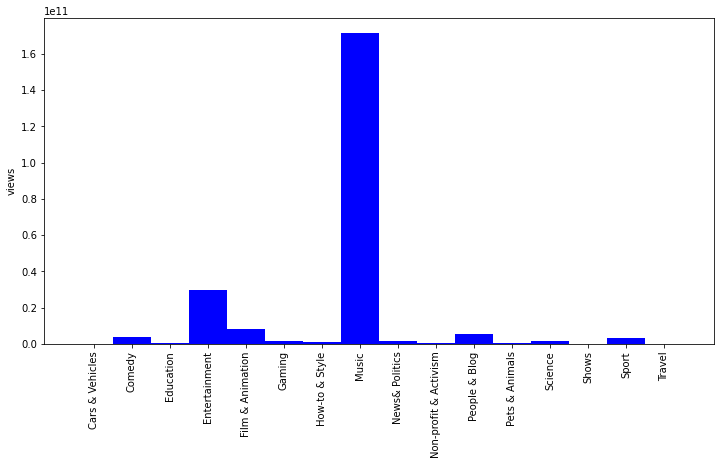

In [14]:
category_UK = [category for category, df in df_UK.groupby('category_id')]


plt.figure(figsize = (12,6))
plt.bar(category_UK, df_UK.groupby('category_id')['views'].sum(), color='b',align='center',width=1)
plt.xticks(category_UK, rotation='vertical')
plt.ylabel('views')
plt.show()

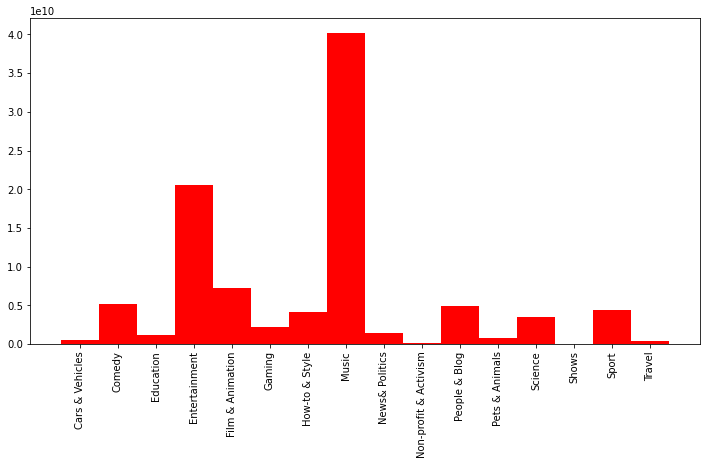

In [15]:
category_US = [category for category, df in df_US.groupby('category_id')]

plt.figure(figsize = (12,6))

plt.bar(category_US, df_US.groupby('category_id')['views'].sum(),color='r', align='center',width=1)
plt.xticks(category_US, rotation= 'vertical')
plt.show()

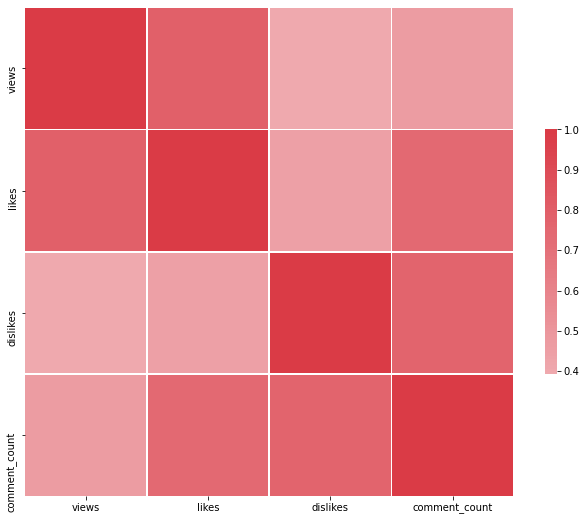

In [39]:
corr=df_UK[['views','likes','dislikes','comment_count']].corr()
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

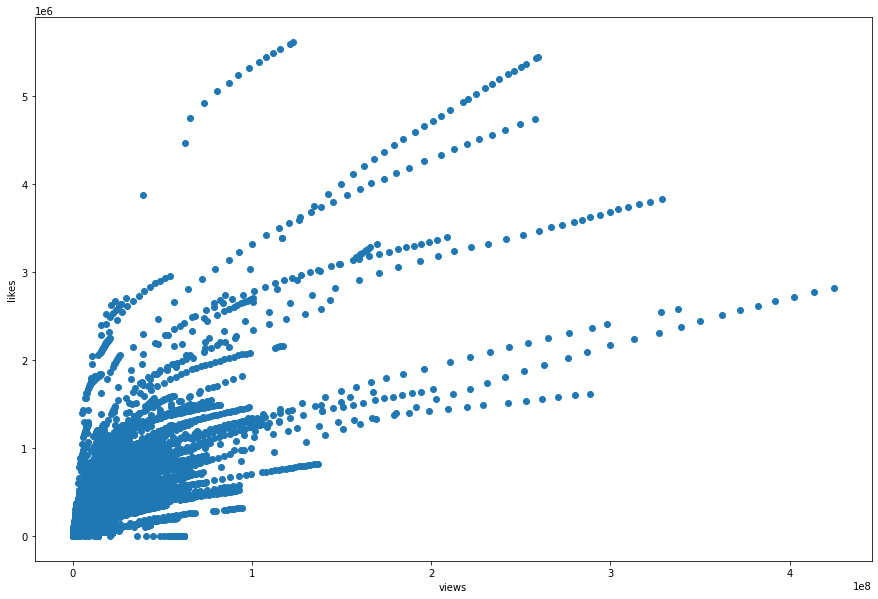

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(df_UK.views, df_UK.likes)
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

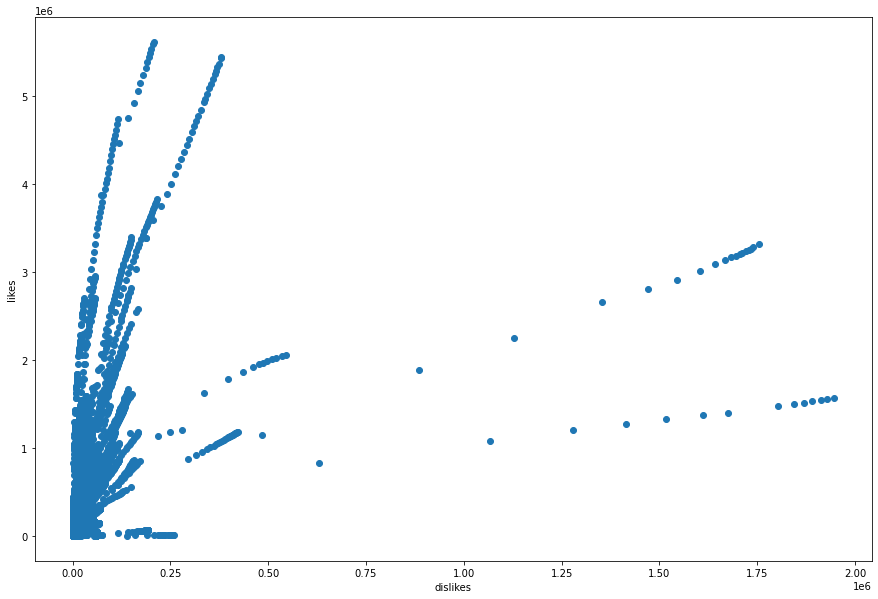

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(df_UK.dislikes, df_UK.likes)
plt.xlabel('dislikes')
plt.ylabel('likes')
plt.show()

In [19]:
df_UK['trending_month']= df_UK['trending_date'].str[6:8]

In [20]:
df_UK['channel_title'].value_counts().nlargest(20)

The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
The Late Late Show with James Corden      202
Late Night with Seth Meyers               194
Breakfast Club Power 105.1 FM             193
The Late Show with Stephen Colbert        189
Netflix                                   187
SMTOWN                                    178
Warner Bros. Pictures                     168
RedLetterMedia                            162
Movieclips Trailers                       162
BBC Radio 1                               157
jypentertainment                          155
PewDiePie                                 152
Marvel Entertainment                      148
TMZSports                                 145
WORLDSTARHIPHOP                           143
Name: channel_title, dtype: int64

In [21]:
df_UK['tags'].head()

0    christmas|"john lewis christmas"|"john lewis"|...
1    SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
2    Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...
3    Salford City FC|"Salford City"|"Salford"|"Clas...
4                                               [none]
Name: tags, dtype: object

In [22]:
tag_split= df_UK['tags'].apply(lambda x: str(x.split('|')))

In [23]:
tag_split = tag_split.apply(lambda x: x.replace('"','').strip('[]').replace("'",''))

In [24]:
df_UK['tag_split']= tag_split

In [25]:
number_tags_split= tag_split.apply(lambda x : len(x.split(',')))

In [26]:
df_UK['count_tag'] = number_tags_split

In [27]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_UK['tag_split']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

(' comedy', ' funny') 725
(' funny', ' humor') 688
(' jokes', ' funny video') 607
(' funny', ' comedy') 604
(' Hip', ' Hop') 543
(' late night', ' comedian') 527
(' comedy', ' humor') 513
(' late night', ' funny') 490
(' comedy', ' comedian') 466
(' jokes', ' funny') 448


In [28]:
df_UK.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Year,Month,trending_month,tag_split,count_tag
0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,How-to & Style,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,0,0,0,Click here to continue the story and make your...,2017,11,11,"christmas, john lewis christmas, john lewis, c...",9
1,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,0,0,0,Musical guest Taylor Swift performs …Ready for...,2017,11,11,"SNL, Saturday Night Live, SNL Season 43, Episo...",36
2,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,11,"Eminem, Walk, On, Water, Aftermath/Shady/Inter...",6
3,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sport,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,0,0,0,Salford drew 4-4 against the Class of 92 and F...,2017,11,11,"Salford City FC, Salford City, Salford, Class ...",9
4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News& Politics,2017-11-13 01:45:13+00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,0,0,0,Dashcam captures truck's near miss with child ...,2017,11,11,[none],1


In [29]:
top10view_channel= df_UK.groupby('channel_title')['views'].sum().nlargest(10)
top10view_channel

channel_title
NickyJamTV              8516190092
Ozuna                   8305198063
Bad Bunny               6891280759
DrakeVEVO               6581834413
ChildishGambinoVEVO     6101309613
Flow La Movie           5151438858
ArianaGrandeVevo        4107436350
Marvel Entertainment    3993421220
jypentertainment        3624070589
Ed Sheeran              3589056783
Name: views, dtype: int64

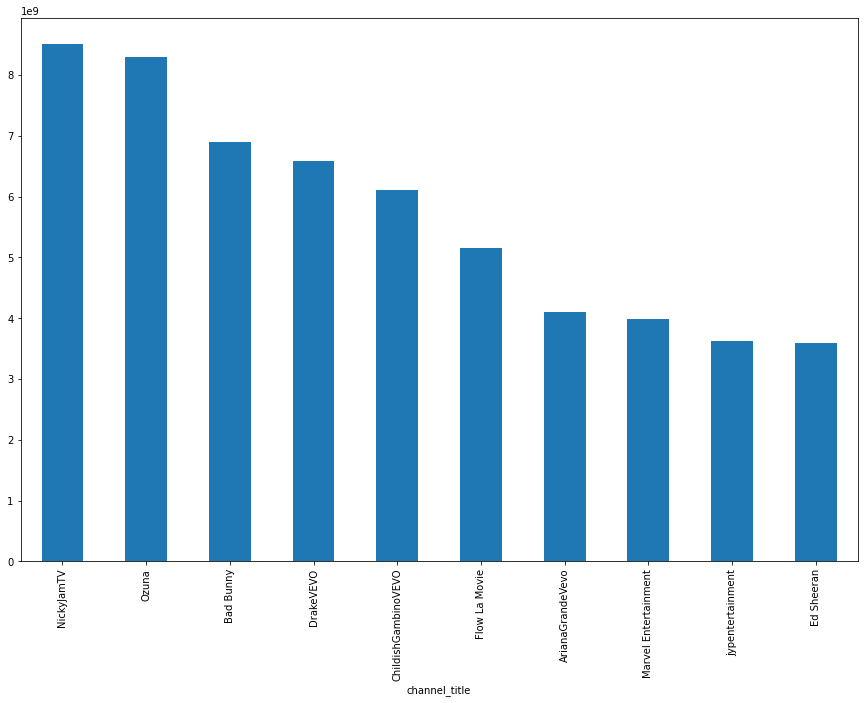

In [30]:
channel = df_UK.groupby('channel_title')
plt.figure(figsize=(15,10))
channel['views'].sum().nlargest(10).plot.bar()
plt.show()

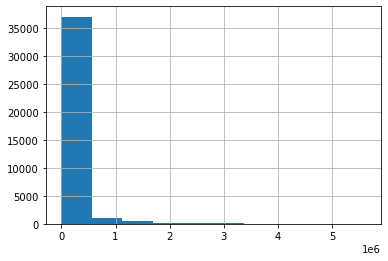

In [31]:
df_UK['likes'].hist()

In [32]:
df_UK['channel_title'].value_counts()[:20]

The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
The Late Late Show with James Corden      202
Late Night with Seth Meyers               194
Breakfast Club Power 105.1 FM             193
The Late Show with Stephen Colbert        189
Netflix                                   187
SMTOWN                                    178
Warner Bros. Pictures                     168
RedLetterMedia                            162
Movieclips Trailers                       162
BBC Radio 1                               157
jypentertainment                          155
PewDiePie                                 152
Marvel Entertainment                      148
TMZSports                                 145
WORLDSTARHIPHOP                           143
Name: channel_title, dtype: int64

In [33]:
df_UK.pivot_table(index=['category_id','trending_date'], values='views').sort_values('views', ascending=False)

views
category_id           trending_date              
Non-profit & Activism 18.31.01       2.374239e+07
Music                 18.24.05       2.367337e+07
                      18.18.05       2.363981e+07
                      18.23.05       2.333665e+07
Non-profit & Activism 18.30.01       2.316409e+07
...                                           ...
                      18.12.02       3.832400e+04
                      18.11.02       3.728300e+04
                      18.10.02       3.624500e+04
                      17.23.12       3.087000e+04
                      17.22.12       1.927000e+04

[2605 rows x 1 columns]

<Figure size 864x720 with 0 Axes>

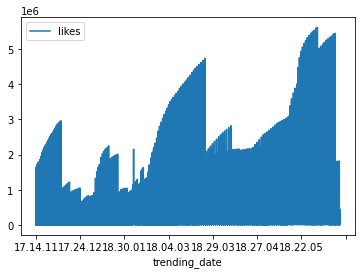

In [34]:
plt.figure(figsize=(12,10))
df_UK[df_UK['category_id']=='Music'].plot(x='trending_date', y='likes')

### Word cloud

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

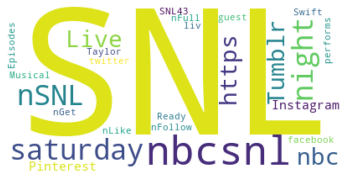

In [36]:
text=df_UK.description[1]
wordcloud = WordCloud(max_font_size=500, max_words=100, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

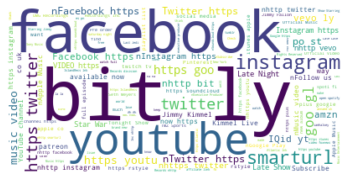

In [37]:
text = " ".join(str(review) for review in df_UK.description)
stopwords =set(STOPWORDS)
wordcloud=WordCloud(stopwords = stopwords, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

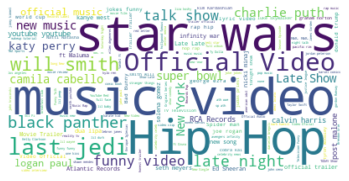

In [38]:
tag= ' '.join(tag for tag in df_UK.tag_split)
stopwords= set(STOPWORDS)
wordcloud_tag = WordCloud(stopwords = stopwords, background_color='white').generate(tag)
plt.imshow(wordcloud_tag, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
import pickle
transcript= df_UK[['category_id','description']]
transcript

,category_id,description
0,How-to & Style,Click here to continue the story and make your...
1,Entertainment,Musical guest Taylor Swift performs …Ready for...
2,Music,Eminem's new track Walk on Water ft. Beyoncé i...
3,Sport,Salford drew 4-4 against the Class of 92 and F...
4,News& Politics,Dashcam captures truck's near miss with child ...
...,...,...
38911,Music,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,Music,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Music,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,Entertainment,Eleni Foureira represented Cyprus at the first...


In [46]:
transcript.to_pickle('description.pkl')